# Bayesian Networks

### Importing Required Libraries

In [3]:
## BNLearn: https://pypi.org/project/bnlearn/
## Doc: https://erdogant.github.io/bnlearn/pages/html/Quickstart.html 
# pip install bnlearn

SyntaxError: invalid syntax (<ipython-input-3-cd568a399531>, line 2)

In [1]:
# Import library
import bnlearn as bn

### Structural learning

[bnlearn] >Loading bif file <C:\Users\aleja\anaconda3\lib\site-packages\bnlearn\data\ASIA/asia.bif>
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Plot based on BayesianModel


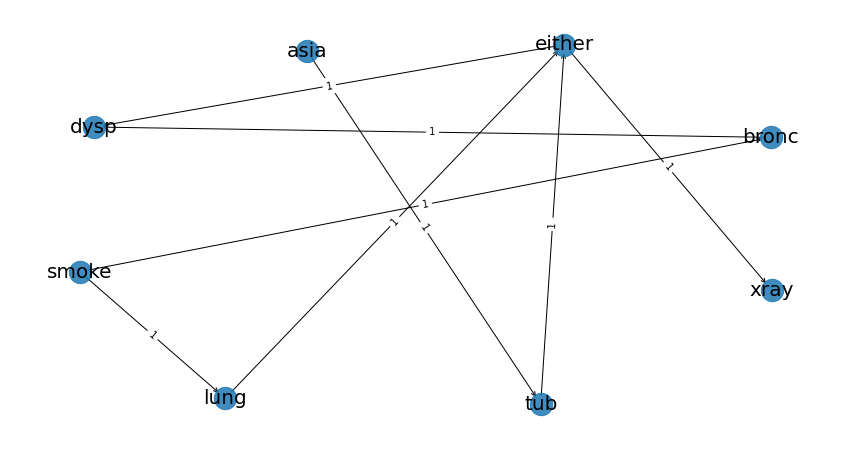

{'pos': {'asia': array([-0.30775379,  0.87125729]),
  'tub': array([ 0.33408393, -1.        ]),
  'smoke': array([-0.93345869, -0.29822084]),
  'lung': array([-0.53370741, -0.96965768]),
  'bronc': array([0.96661279, 0.41493409]),
  'either': array([0.39925867, 0.90674894]),
  'xray': array([ 0.96902852, -0.39478658]),
  'dysp': array([-0.89406403,  0.46972478])},
 'G': <networkx.classes.digraph.DiGraph at 0x25eb7d60340>}

In [2]:
# Plot the ideal DAG
model_ideal = bn.import_DAG('Asia')
bn.plot(model_ideal)

In [14]:
# Example dataframe sprinkler_data.csv can be loaded with: 
#df = bn.import_example()

df = bn.import_example(data='Asia')
# df = pd.read_csv('sprinkler_data.csv')
df

Generating for node: xray: 100%|██████████| 8/8 [00:00<00:00, 21.68it/s]  


,smoke,bronc,lung,asia,tub,either,dysp,xray
0,0,1,1,1,1,1,1,1
1,1,0,1,1,1,1,0,1
2,1,0,1,1,1,1,1,1
3,1,0,1,1,1,1,0,1
4,0,0,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1
9996,0,1,1,1,1,1,1,1
9997,0,1,1,1,1,1,1,1
9998,0,0,1,1,1,1,1,1


In [5]:
# Structural learning
model = bn.structure_learning.fit(df)


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


[bnlearn] >Plot based on BayesianModel


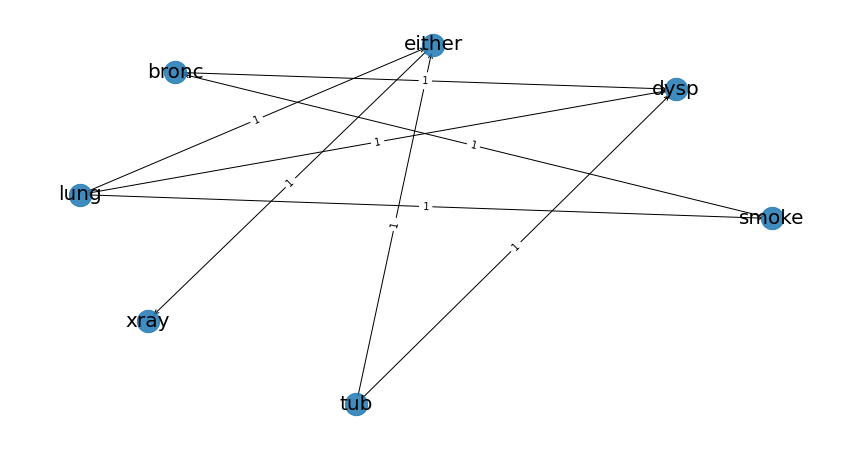

In [6]:
# Plot the model
G = bn.plot(model)

[bnlearn] >Existing coordinates from <pos> are used.


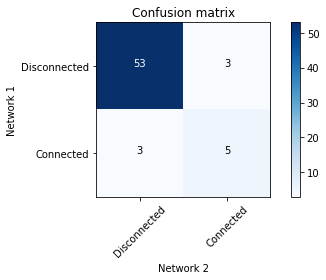

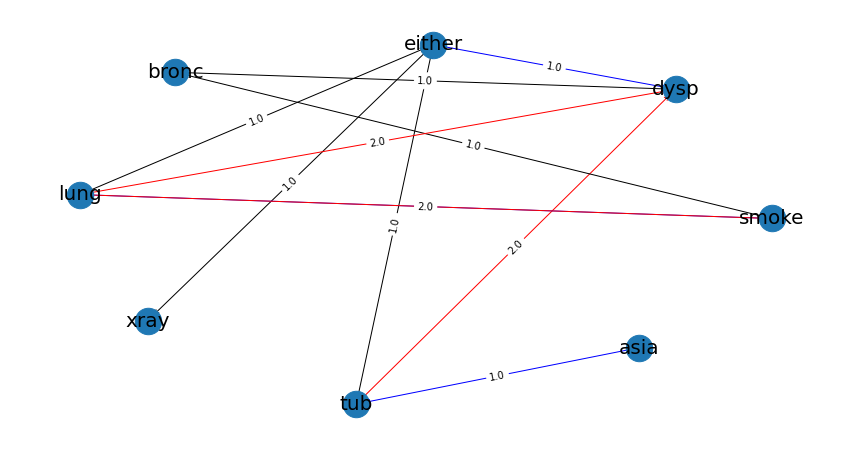

(array([[53,  3],
        [ 3,  5]], dtype=int64),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     0      0       1     0     2
 smoke      0    0      0    -1      1       0     0     0
 lung       0    0      2     0      0       1     0     2
 bronc      0    0      0     0      0       0     0     1
 either     0    0      0     0      0       0     1    -1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [7]:
# Compare networks and make plot
bn.compare_networks(model_ideal, model, pos=G['pos'])

### Exercise:
 - Learn the structure using Hill Climbing, Exhaustive Search and the Chow-Liu algorihtm.
 - Use the criteria BIC, K2 and BDeu for Hill Climbing and Exhaustive search
 - Compare the resulting models with the ideal model and choose the most similar one.

In [8]:
## Hill Climbing
model_hc_bic  = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')
model_hc_k2   = bn.structure_learning.fit(df, methodtype='hc', scoretype='k2')
model_hc_bdeu = bn.structure_learning.fit(df, methodtype='hc', scoretype='bdeu')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]


In [10]:
model_cl      = bn.structure_learning.fit(df, methodtype='cl', root_node='dysp')

Building tree: 100%|██████████| 28/28.0 [00:00<00:00, 254.54it/s]

[bnlearn] >Computing best DAG using [cl]


[bnlearn] >Existing coordinates from <pos> are used.


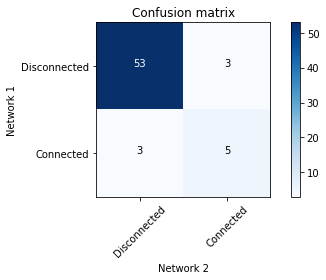

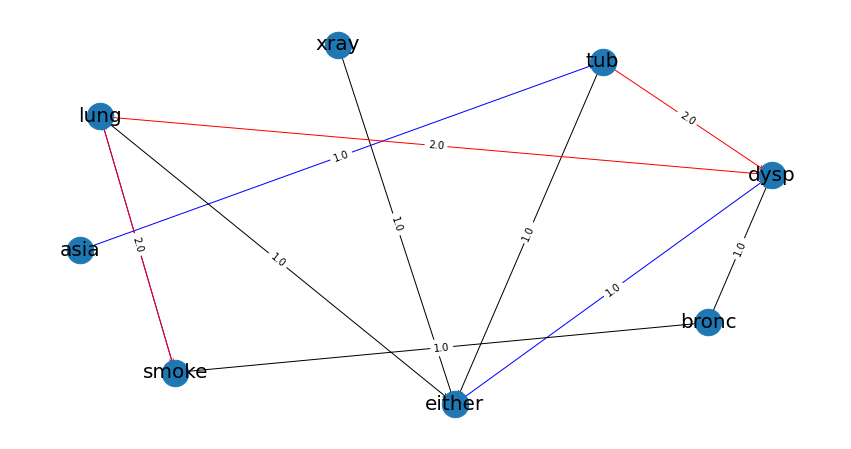

(array([[53,  3],
        [ 3,  5]], dtype=int64),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     0      0       1     0     2
 smoke      0    0      0    -1      1       0     0     0
 lung       0    0      2     0      0       1     0     2
 bronc      0    0      0     0      0       0     0     1
 either     0    0      0     0      0       0     1    -1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [20]:
### Compare these models with the ideal one...
bn.compare_networks(model_ideal, model_hc_bic, pos=G['pos'])

[bnlearn] >Existing coordinates from <pos> are used.


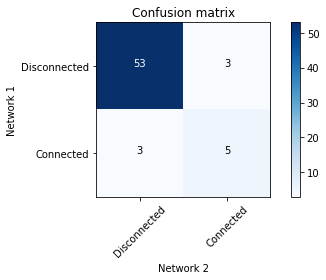

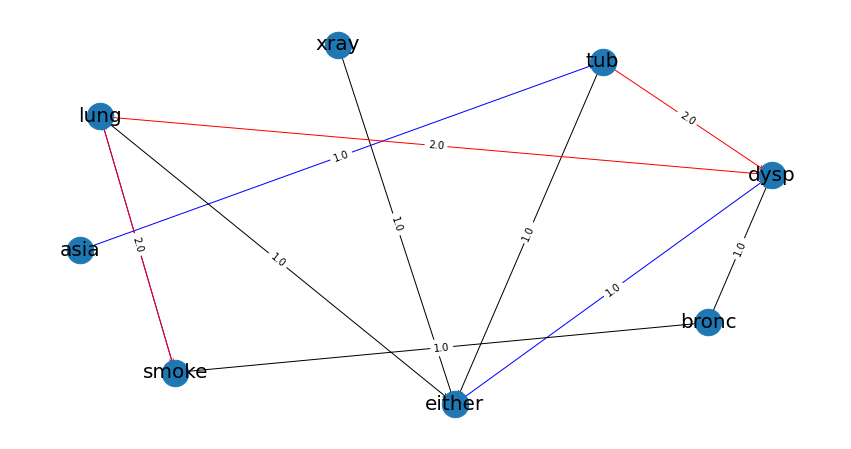

(array([[53,  3],
        [ 3,  5]], dtype=int64),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     0      0       1     0     2
 smoke      0    0      0    -1      1       0     0     0
 lung       0    0      2     0      0       1     0     2
 bronc      0    0      0     0      0       0     0     1
 either     0    0      0     0      0       0     1    -1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [21]:
bn.compare_networks(model_ideal, model_hc_k2, pos=G['pos'])

[bnlearn] >Existing coordinates from <pos> are used.


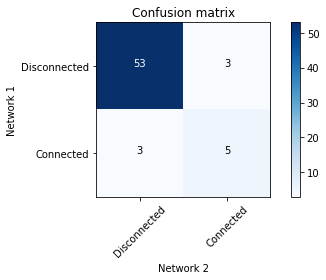

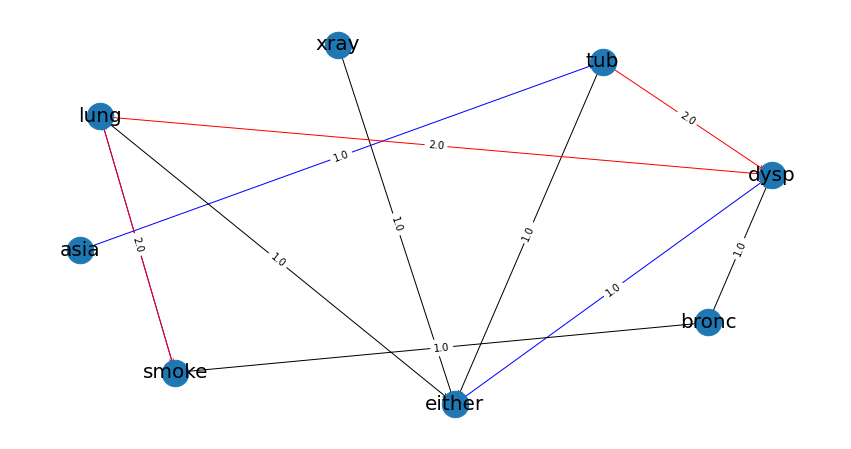

(array([[53,  3],
        [ 3,  5]], dtype=int64),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     0      0       1     0     2
 smoke      0    0      0    -1      1       0     0     0
 lung       0    0      2     0      0       1     0     2
 bronc      0    0      0     0      0       0     0     1
 either     0    0      0     0      0       0     1    -1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      0       0     0     0)

In [22]:
bn.compare_networks(model_ideal, model_hc_bdeu, pos=G['pos'])

[bnlearn] >Existing coordinates from <pos> are used.


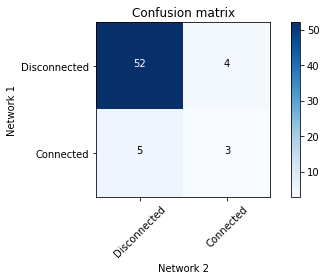

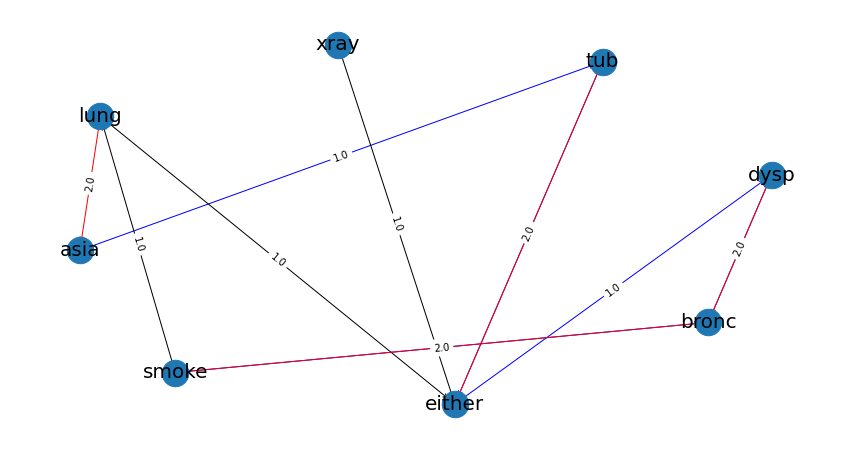

(array([[52,  4],
        [ 5,  3]], dtype=int64),
 target  asia  tub  smoke  lung  bronc  either  xray  dysp
 source                                                   
 asia       0   -1      0     0      0       0     0     0
 tub        0    0      0     0      0      -1     0     0
 smoke      0    0      0     1     -1       0     0     0
 lung       2    0      0     0      0       1     0     0
 bronc      0    0      2     0      0       0     0    -1
 either     0    2      0     0      0       0     1    -1
 xray       0    0      0     0      0       0     0     0
 dysp       0    0      0     0      2       0     0     0)

In [23]:
bn.compare_networks(model_ideal, model_cl, pos=G['pos'])

### Parametric learning

In [12]:
# As an example we set the CPD at False which returns an "empty" DAG
model = bn.import_DAG('Asia', CPD=False)

[bnlearn] >Loading bif file <C:\Users\aleja\anaconda3\lib\site-packages\bnlearn\data\ASIA/asia.bif>


In [15]:
# Now we learn the parameters of the DAG using the df
model_update = bn.parameter_learning.fit(model, df, methodtype='bayes')

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >CPD of asia:
+---------+-----------+
| asia(0) | 0.0544545 |
+---------+-----------+
| asia(1) | 0.945545  |
+---------+-----------+
[bnlearn] >CPD of bronc:
+----------+------------------+---------------------+
| smoke    | smoke(0)         | smoke(1)            |
+----------+------------------+---------------------+
| bronc(0) | 0.58981871452115 | 0.31720527170969487 |
+----------+------------------+---------------------+
| bronc(1) | 0.41018128547885 | 0.6827947282903051  |
+----------+------------------+---------------------+
[bnlearn] >CPD of dysp:
+---------+--------------------+-----------+---------------------+---------------------+
| bronc   | bronc(0)           | bronc(0)  | bronc(1)            | bronc(1)            |
+---------+--------------------+-----------+---------------------+---------------------+
| either  | either(0)          | either(1) | either(0)           | either(1)           |
+------

[bnlearn] >Plot based on BayesianModel


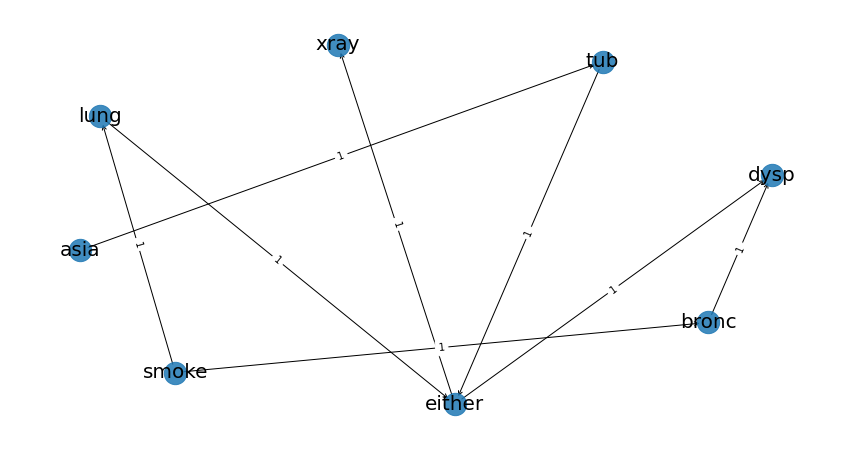

In [16]:
# Make plot
G = bn.plot(model_update)

In [19]:
# As an example we set the CPD at False which returns an "empty" DAG
model = bn.import_DAG('Asia', CPD=False)

# Now we learn the parameters of the DAG using the Maximum Likelihood
model_update = bn.parameter_learning.fit(model, df, methodtype='ml')

[bnlearn] >Loading bif file <C:\Users\aleja\anaconda3\lib\site-packages\bnlearn\data\ASIA/asia.bif>
[bnlearn] >Parameter learning> Computing parameters using [ml]


ValueError: variable names of the model must be identical to column names in data

### Inference

    1.-How likely is that a person has visited Asia?
    

In [35]:
model = bn.import_DAG('Asia')
q_1 = bn.inference.fit(model_ideal, variables=['asia'], evidence={})


Finding Elimination Order: : 100%|██████████| 6/6 [04:54<00:00, 49.00s/it]

[bnlearn] >Loading bif file <C:\Users\aleja\anaconda3\lib\site-packages\bnlearn\data\ASIA/asia.bif>



Eliminating: dysp: 100%|██████████| 7/7 [00:00<00:00, 97.22it/s]

[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Variable Elimination..
+---------+-------------+
| asia    |   phi(asia) |
+=========+=============+
| asia(0) |      0.0100 |
+---------+-------------+
| asia(1) |      0.9900 |
+---------+-------------+


    2.-How likely is that a person has visited Asia given that he has Tuberculosis?
 

In [37]:
q_2 = bn.inference.fit(model, variables=['asia'], evidence={'tub':0})



  0%|          | 0/6 [00:00<?, ?it/s]

Finding Elimination Order: :   0%|          | 0/6 [00:00<?, ?it/s]


  0%|          | 0/6 [00:00<?, ?it/s]


Eliminating: lung:   0%|          | 0/6 [00:00<?, ?it/s]


Eliminating: bronc:   0%|          | 0/6 [00:00<?, ?it/s]


Eliminating: smoke:   0%|          | 0/6 [00:00<?, ?it/s]


Eliminating: xray:   0%|          | 0/6 [00:00<?, ?it/s] 


Eliminating: either:   0%|          | 0/6 [00:00<?, ?it/s]


Eliminating: dysp: 100%|██████████| 6/6 [00:00<00:00, 142.85it/s][A

[bnlearn] >Variable Elimination..
+---------+-------------+
| asia    |   phi(asia) |
+=========+=============+
| asia(0) |      0.0481 |
+---------+-------------+
| asia(1) |      0.9519 |
+---------+-------------+


    3.-How likely is that a person has visited Asia given that he has Tuberculosis and Bronchitis?


In [38]:
q_3 = bn.inference.fit(model, variables=['asia'], evidence={'tub':0,'bronc':0})




  0%|          | 0/5 [00:00<?, ?it/s]


Finding Elimination Order: :   0%|          | 0/5 [00:00<?, ?it/s]



  0%|          | 0/5 [00:00<?, ?it/s]



Eliminating: lung:   0%|          | 0/5 [00:00<?, ?it/s]



Eliminating: smoke:   0%|          | 0/5 [00:00<?, ?it/s]



Eliminating: xray:   0%|          | 0/5 [00:00<?, ?it/s] 



Eliminating: either:   0%|          | 0/5 [00:00<?, ?it/s]



Eliminating: dysp: 100%|██████████| 5/5 [00:00<00:00, 106.38it/s][A

[bnlearn] >Variable Elimination..
+---------+-------------+
| asia    |   phi(asia) |
+=========+=============+
| asia(0) |      0.0481 |
+---------+-------------+
| asia(1) |      0.9519 |
+---------+-------------+


    4.-How likely is that a person has either Tubercolosis or Bronchitis given he has visited Asia and has Dyspnea?

In [40]:
q_4 = bn.inference.fit(model, variables=['tub','bronc'], evidence={'asia':1,'dysp':1})

Eliminating: either: 100%|██████████| 4/4 [00:00<00:00, 108.11it/s]

[bnlearn] >Variable Elimination..
+--------+----------+------------------+
| tub    | bronc    |   phi(tub,bronc) |
+========+==========+==================+
| tub(0) | bronc(0) |           0.0008 |
+--------+----------+------------------+
| tub(0) | bronc(1) |           0.0029 |
+--------+----------+------------------+
| tub(1) | bronc(0) |           0.1524 |
+--------+----------+------------------+
| tub(1) | bronc(1) |           0.8439 |
+--------+----------+------------------+


### Sampling to a dataframe

In [18]:
model = bn.import_DAG('sprinkler')
df = bn.sampling(model, n=1000)

Generating for node: Wet_Grass: 100%|██████████| 4/4 [00:00<00:00, 176.66it/s]

[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
[bnlearn] >Forward sampling for 1000 samples..


In [19]:
df

,Cloudy,Rain,Sprinkler,Wet_Grass
0,1,1,1,1
1,1,1,0,1
2,0,0,0,0
3,0,0,1,0
4,1,1,0,1
...,...,...,...,...
995,0,0,0,0
996,1,1,1,1
997,1,1,0,1
998,1,1,1,1


Use the python library BNLearn and answer the following questions:

    1.-Load and plot the Asia example.
    2.-Load only data from the Asia example and train models using Hill Climbing and Chow-Liu
       R= All hill climbing models with the different score types returned the same model, which concides a little bit better to the ideal one than the Chow-Li
    3.-Compare the resulting models with the original one. Discuss the differences.
    4.-Encode and answer the following questions
        1.-How likely is that a person has visited Asia?
        R=  0.9900
        2.-How likely is that a person has visited Asia given that he has Tuberculosis?
        R= 0.9519
        3.-How likely is that a person has visited Asia given that he has Tuberculosis and Bronchitis?
        R= 0.9519
        4.-How likely is that a person has either Tubercolosis or Bronchitis given he has visited Asia and has Dyspnea?
        +----------+--------+------------------+
        | bronc(0) | tub(1) |           0.7664 |
        +----------+--------+------------------+
        | bronc(1) | tub(0) |           0.0428 |
        +----------+--------+------------------+
                                        0.8092
        R= 0.8092
    5.-Discuss:
        1.-Why the answer for the second and third query is the same? 
        R= Because in the model bronchitis is not linked to visiting Asia
        2.-How could both answers be different?
        R= Were bronchitis linked to visiting Asia then the answers would be different or if Dyspnea, eithero or x-ray were either positive or negative

